## Classification using Tensorflow

We are going to try the digits data set - actually two different digits datasets and use Neural Networks to classify them.

Convolutional Neural Networks are the best thing around for images now, but they're for next week.

Digits have 10 possible categories.

I'm not spending much time trying to decide on the number of layers and units - I could use validation sets to try picking better ones but I just want to demonstrate to you some of the features of the library

In [1]:
import tensorflow as tf     # pip install tensorflow if necessary
import tensorflow_datasets as tfds      # pip install tensorflow_datasets if necessary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Let's use sklearn's dataset first

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
data = digits.images
print(digits.target)    # print all the target values

[0 1 2 ... 8 9 8]


So the targets are the numbers 
0,1,2,3,4,5,6,7,8,9

10 possible classes

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42)

In [4]:
X_train

array([[[ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  3., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  4., 16., ..., 15.,  2.,  0.],
        [ 0.,  1., 14., ..., 13., 11.,  0.],
        [ 0.,  0.,  3., ..., 13.,  4.,  0.]],

       [[ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0., 15., ..., 12.,  0.,  0.],
        [ 0.,  3., 10., ..., 12.,  5.,  0.],
        ...,
        [ 0.,  5.,  8., ..., 10.,  6.,  0.],
        [ 0.,  4., 13., ..., 13.,  0.,  0.],
        [ 0.,  0.,  6., ...,  3.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  3.,  0.,  0.],
        [ 0.,  0.,  8., ..., 12.,  0.,  0.],
        [ 0.,  3., 16., ..., 14.,  1.,  0.],
        ...,
        [ 0.,  2., 13., ..., 16.,  4.,  0.],
        [ 0.,  0., 10., ..., 14.,  1.,  0.],
        [ 0.,  0.,  2., ...,  6.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  9., ..., 13.,  1.,  0.],
        [ 0.,  0., 12., ..., 16.,  7.,  0.],
        [ 0.,  0.,  0., ..., 16.,  4.,  0.

In [5]:
X_train.shape

(1437, 8, 8)

8 x 8 images, not very detailed but let's do it anyway

In [6]:
X_train.min()

0.0

In [7]:
X_train.max()

16.0

Greyscale, with min 0 and max 16. It doesn't even have 255 possibilities! It's a 4-bit image. 

But anyway, we can still do machine learning

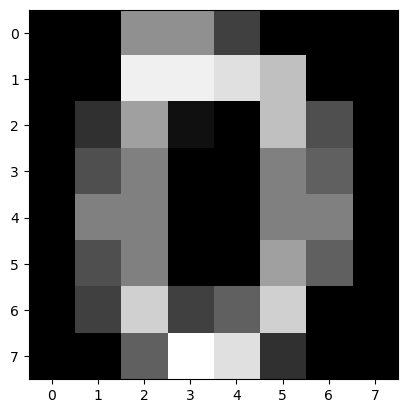

In [8]:
plt.imshow(X_train[1],cmap='gray')

We should scale the numbers data between 0 and 1 rather than 0 and 16. To do this let's just divide by 16. But let's build it into the model by setting up a rescaling layer

In [9]:
div16 = tf.keras.layers.Rescaling(scale=1./16, input_shape=(8, 8))

Sequential Model as usual

In [10]:
model = tf.keras.models.Sequential()
model.add(div16) # add in the rescaling

For the Dense layers, it has to be a "flattened" image. i.e. instead of X_train[0] being 8x8 we want it to be 64.

In [11]:
model.add(tf.keras.layers.Flatten())

Now let's add the hidden layers. I'm going for 2 hidden layers each with 40 units. Why? No real reason why I picked that structure, I just want to see what happens with it

In [12]:
model.add(tf.keras.layers.Dense(40,activation='relu'))
model.add(tf.keras.layers.Dense(40,activation='relu'))

We now need an output layer. Since there are 10 possible categories we need 10 units on the output layer

In [13]:
model.add(tf.keras.layers.Dense(10))

Let's view our model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 8, 8)              0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 40)                2600      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 4650 (18.16 KB)
Trainable params: 4650 (18.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


It needs to learn 4,650 parameters

Now compile it. We need to pick the optimiser (just use Adam), the learning rate, the loss function and the metrics that we'll measure (we can put recall and precision in here too and get those values at each epoch)

## Why SparseCategoricalCrossentropy?

categorical_cross_entropy is for one-hot encoded data i.e. as vectors
<img src="onehot.png">

I want to just use numbers to label the things, SparseCategoricalCrossentropy allows me to just use numbers

For example in the above picture red could be 0, blue 1 and green 2

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

I could try early stopping etc, but let's just go for 20 epochs

In [16]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 2s 23ms/step - loss: 2.2345 - accuracy: 0.2150 - val_loss: 2.0694 - val_accuracy: 0.4132
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 1.8994 - accuracy: 0.4822 - val_loss: 1.7214 - val_accuracy: 0.6042
Epoch 3/50
36/36 [==============================] - 0s 8ms/step - loss: 1.4630 - accuracy: 0.6893 - val_loss: 1.2181 - val_accuracy: 0.7604
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.9874 - accuracy: 0.7868 - val_loss: 0.8061 - val_accuracy: 0.8507
Epoch 5/50
36/36 [==============================] - 0s 10ms/step - loss: 0.6653 - accuracy: 0.8869 - val_loss: 0.5848 - val_accuracy: 0.8854
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.9130 - val_loss: 0.4604 - val_accuracy: 0.8993
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 0.3806 - accuracy: 0.9382 - val_loss: 0.3872 - val_accuracy: 0.9062
Epoch 8/50
36/36 [

Looking at the numbers, we may be overfitting things as the training loss improved increased but the validation accuracy actually just fluctuated

Maybe I should've done early stopping but let's keep going by plotting. I'm copying and pasting this from the regression workbook

Also, I didn't seed any random number generators so you may get a different answer when you run this yourself

In [17]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    try:
        plt.plot(history.history['val_loss'], label='val_loss')
    except:
        None
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

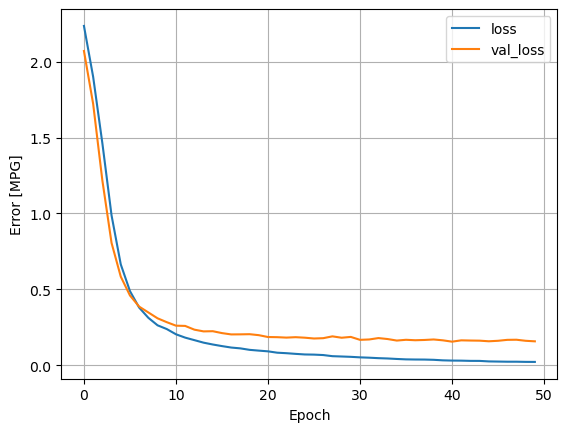

In [18]:
plot_loss(history)

In [19]:
model.evaluate(X_train,y_train)

45/45 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9882


[0.0468943789601326, 0.98816978931427]

In [20]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 0s 5ms/step - loss: 0.1139 - accuracy: 0.9639


[0.11389459669589996, 0.9638888835906982]

View output shape

In [21]:
X_test.shape

(360, 8, 8)

Record output predictions on the test set

In [22]:
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 3ms/step


Print the predictions of the first image

In [23]:
y_pred[0]

array([-0.6934055, -1.7287298, -7.226242 , -4.994857 , -6.233876 ,
       -3.8268394, 12.708881 , -2.4818282,  3.2718675, -2.7865188],
      dtype=float32)

View what the correct class of image [0] in the test set is

In [24]:
y_test[0]

6

The prediction is also a 6.

In [25]:
np.argmax(y_pred[0])

6

Ok, y_pred seems like just a bunch of numbers. Basically we just want the biggest one of those and that's how we classify it.

In my running of it, the biggest number was in position 6 (zero-based index), so the model predicts the thing to be in category 6. Let's view the image to verify

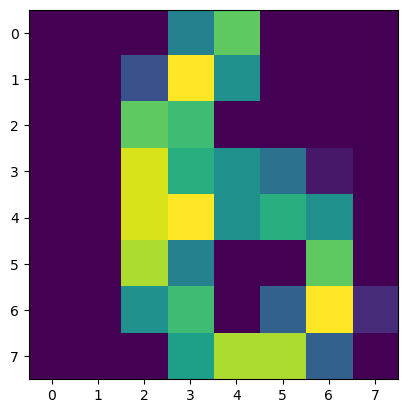

In [26]:
plt.imshow(X_test[0])

That looks like a 6

### Softmax Layer

In class I mentioned using a softmax layer to get probabilities instead at the end. This will look much nicer. I could have included the Softmax layer, made the activation='softmax' in the last layer. However, from Tensorflow documentation:

Note: It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

So this is why I did not do this. Instead I am going to "add" it on like so

In [27]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [28]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                4650      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 4650 (18.16 KB)
Trainable params: 4650 (18.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We don't need to do anymore training, as the model has already learnt all 4,650 parameters. This is a very very simple transfer learning thing but will work well for us now

In [29]:
y_predictions = probability_model.predict(X_test)


12/12 [==============================] - 0s 2ms/step


In [30]:
y_predictions[0][6]

0.99991775

The model says with probability 0.99 that the image is a 6. (Technically it's not exactly a probability but I'm not getting into that since it is "almost" a probability)

This plotting (from Google's docs) will visualise the images

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  #print(predicted_label)
  #print(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [32]:
class_names = np.arange(0,10)

In [33]:
X_test.shape

(360, 8, 8)

In [34]:
y_test.shape

(360,)

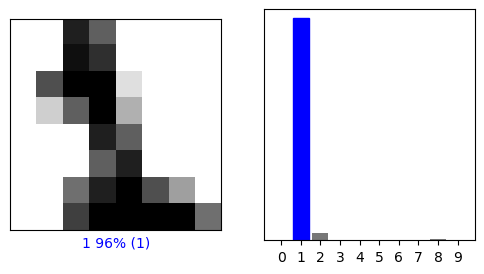

In [35]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_predictions[i],  y_test)
plt.show()


This plots the image on the left. Under that is the predicted class, then the "probability" that the model came up with, in brackets is the correct class.

The left plot shows a barchart of probabilities.

If everything is written in blue and the plot is in blue, then it was a correct prediction. If in red an incorrect prediction.

Let's now print 30 of them

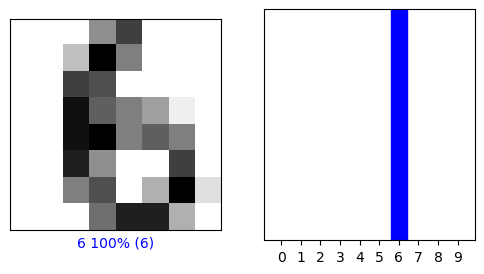

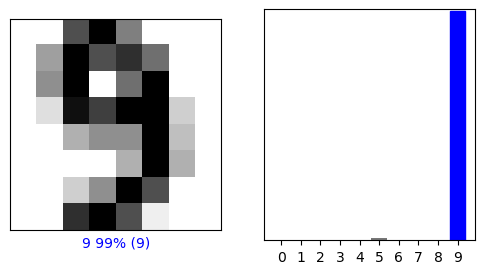

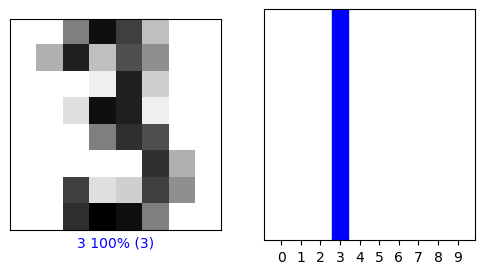

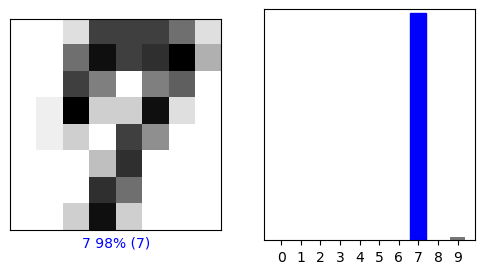

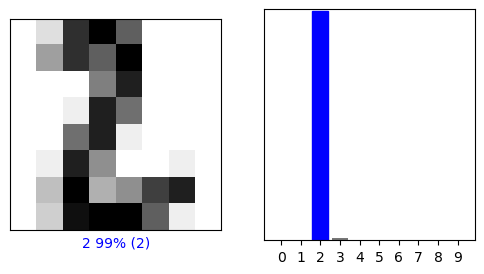

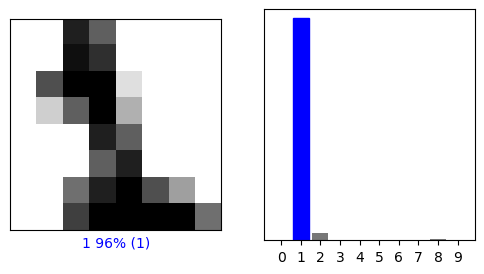

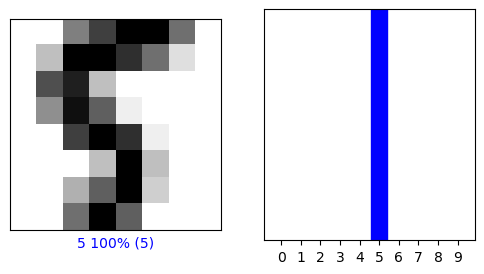

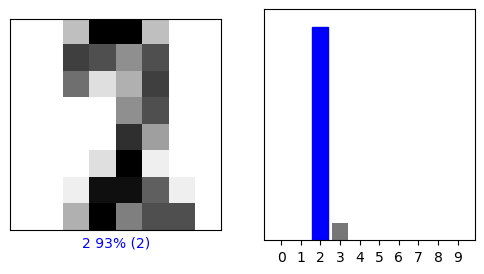

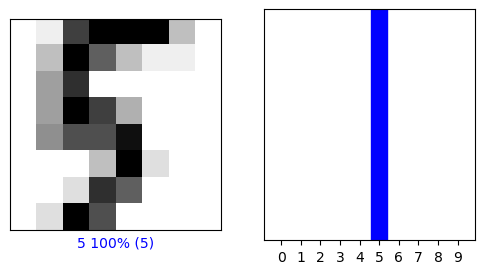

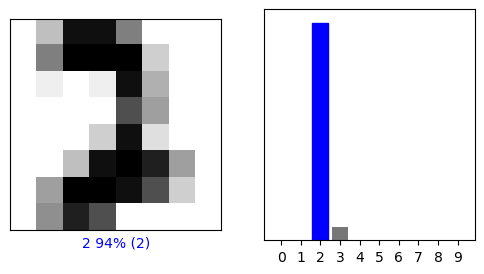

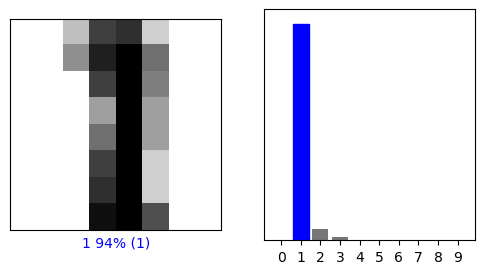

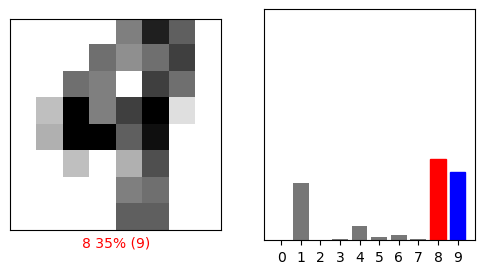

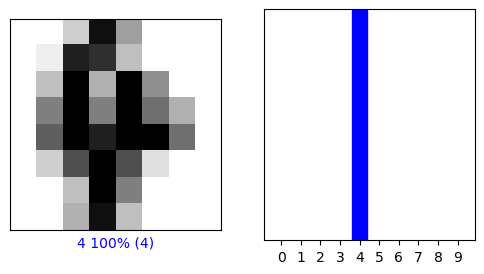

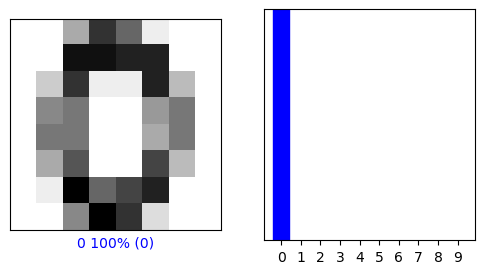

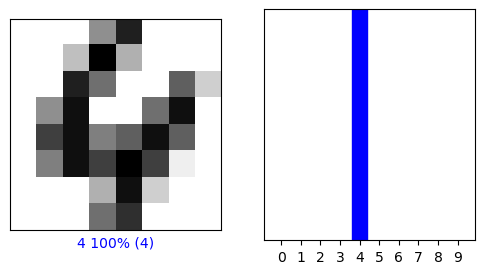

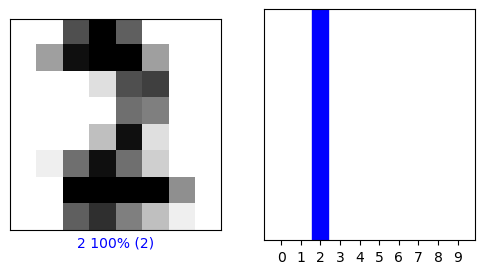

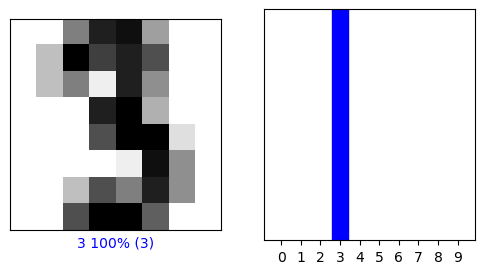

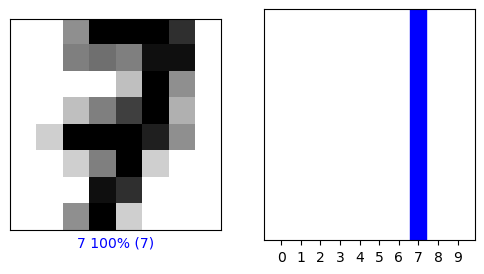

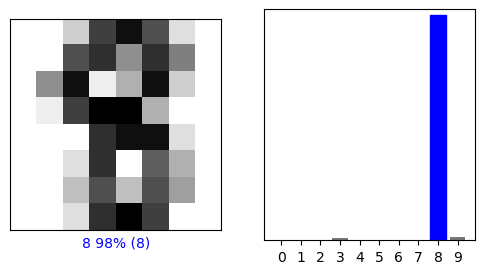

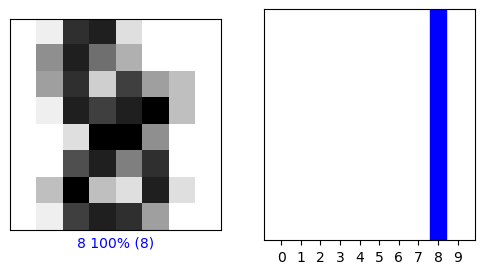

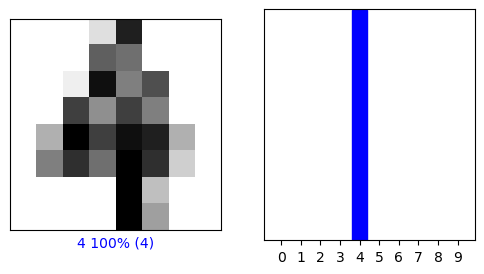

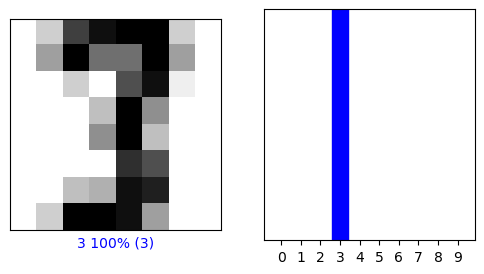

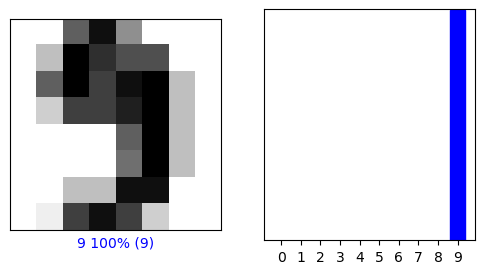

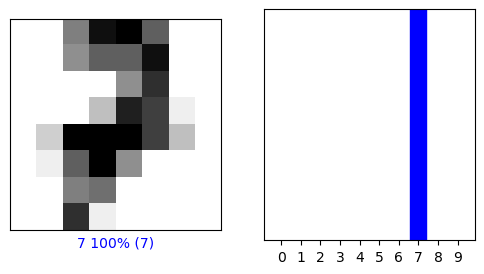

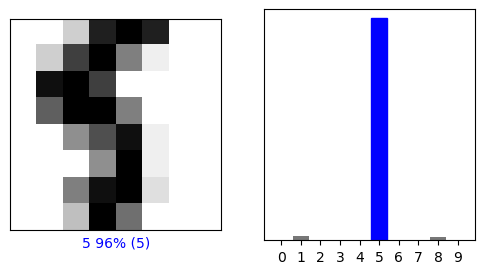

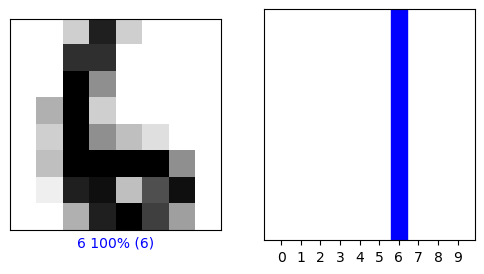

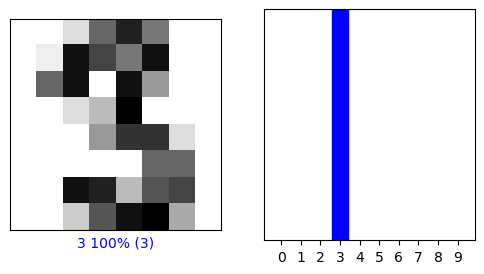

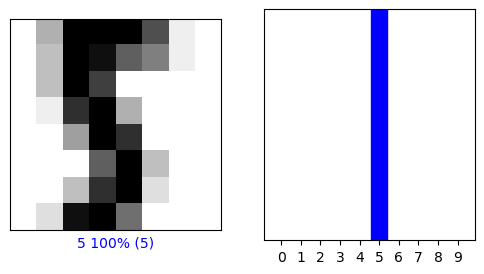

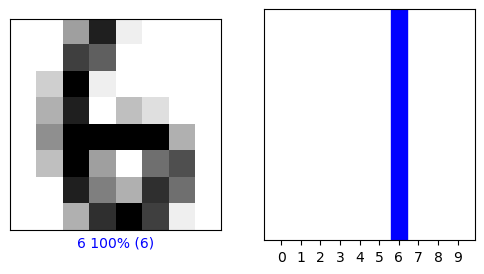

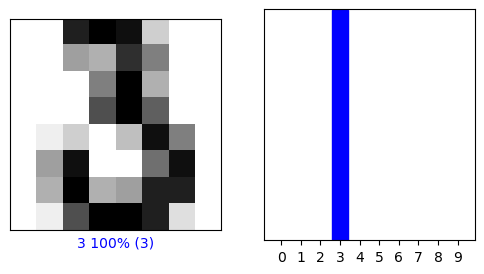

In [36]:
for i in range(0,30):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, y_predictions[i], y_test, X_test)
    plt.subplot(1,2,2)
    plot_value_array(i, y_predictions[i],  y_test)
    plt.show()

Now let's pick some ones I know are incorrect to ensure we see some (maybe 1 of the above were incorrect but all of these following will be)

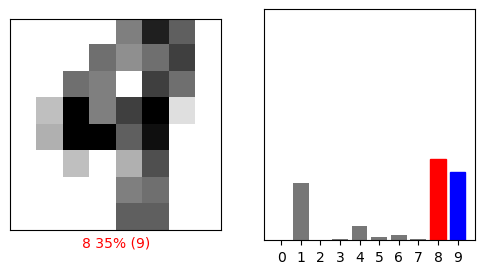

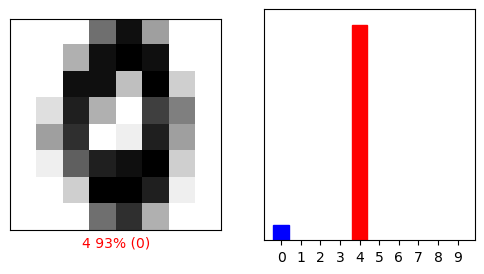

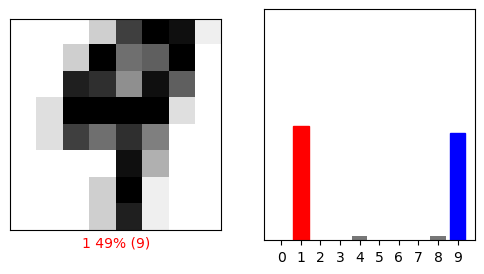

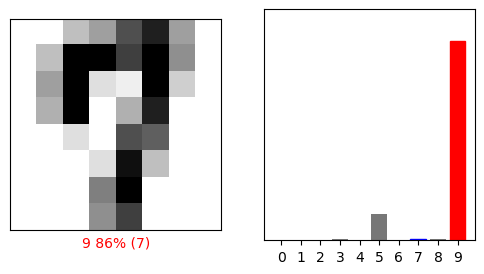

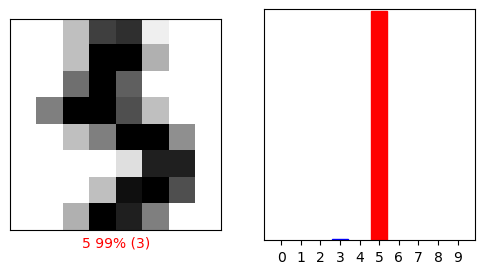

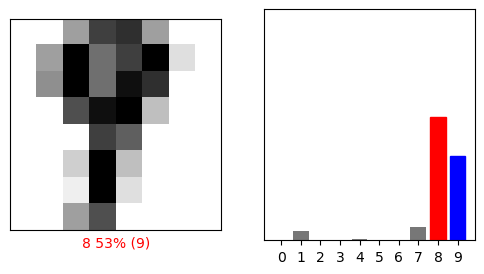

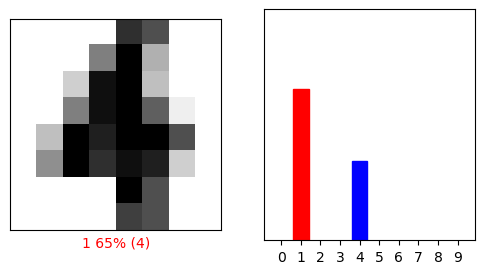

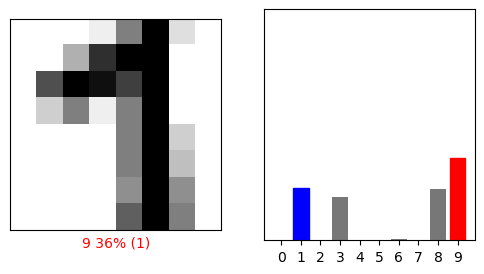

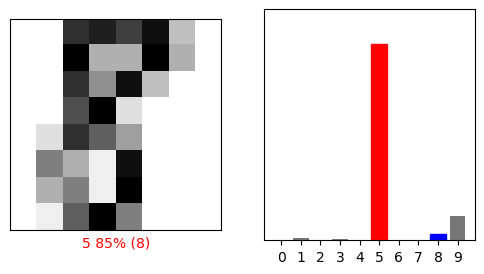

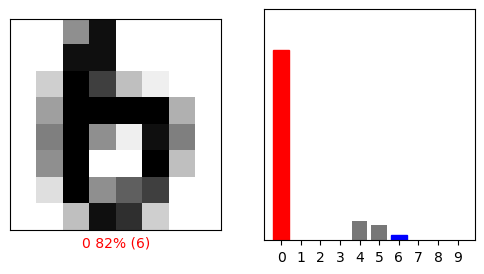

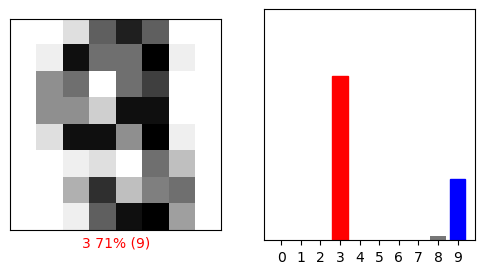

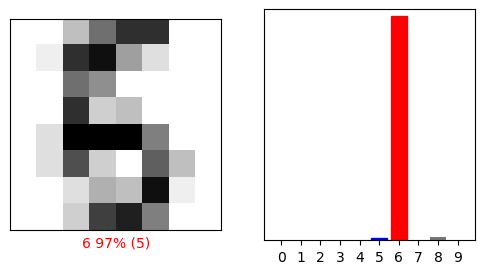

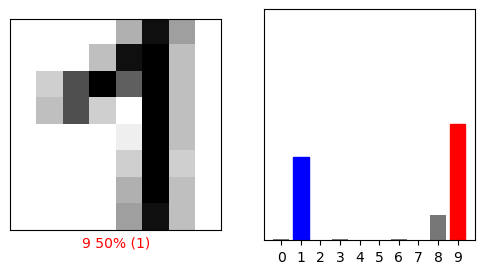

In [37]:
for i in range(0,y_test.shape[0]):
    predicted_label = np.argmax(y_predictions[i])
    true_label = y_test[i]
    if(predicted_label != true_label):      # Check if the prediction doesn't match true label
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, y_predictions[i], y_test, X_test)
        plt.subplot(1,2,2)
        plot_value_array(i, y_predictions[i],  y_test)
        plt.show()

### New Image DataSet.

Now, we'll repeat the above with a "better" dataset. Images with 28x28 resolution!

In [38]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
test_images.shape

(10000, 28, 28)

We're not going to use train_test_split as tf.keras has already divided the images for us

In [41]:
np.max(train_images)

255

8-bit images too, the values go from 0-255.

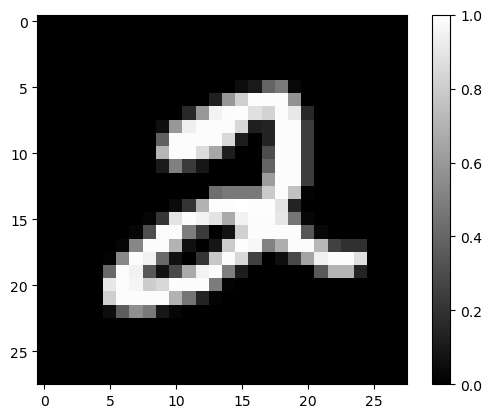

2


In [42]:
plt.figure()
plt.imshow(train_images[5]/255, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[5])

matplotlib works fine with the values from 0-255 or from 0-1 for grayscale. 

0-1 tends to work better. I am <b>not</b> using StandardScaler, I am just dividing by 255

We'll build this into the model. The below will give us a new layer we can use

In [43]:
div255 = tf.keras.layers.Rescaling(scale=1./255, input_shape=(28, 28))

Create Model2. Sequential.

I'll add the div255 layer, the flatten layer, 2 hidden layers with 128 units each and the end dense layer. Compile the model and print the summary

I will not add softmax yet for the reasons stated above. I'll add it afterwards like I did above.


In [44]:
model2 = tf.keras.models.Sequential()
model2.add(div255) # add in the rescaling
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(10))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


It needs to learn 118282 parameters! This stuff is getting trickier

Now we'll compile it. 

In [45]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],    
)

Now we'll fit it, only 30 epochs, this one will take longer than previous one. Your laptop might get warm

In [46]:
history = model2.fit(train_images, train_labels, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2532 - accuracy: 0.9259 - val_loss: 0.1204 - val_accuracy: 0.9646
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1044 - accuracy: 0.9677 - val_loss: 0.1000 - val_accuracy: 0.9690
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.1080 - val_accuracy: 0.9703
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0978 - val_accuracy: 0.9722
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0989 - val_accuracy: 0.9714
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0927 - val_accuracy: 0.9756
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.1059 - val_accuracy:

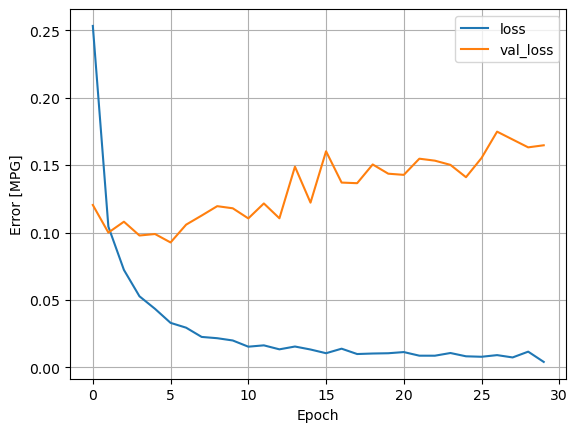

In [47]:
plot_loss(history)

Looks like the model is getting over-fitted

In [48]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1390 - accuracy: 0.9789


[0.13898147642612457, 0.9789000153541565]

Quite a high accuracy, over 97%!

Add the Softmax now

In [49]:
probability_model2 = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
probability_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10)                118282    
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
y_pred = probability_model2.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [51]:
y_pred[0]

array([2.3595092e-19, 3.6313922e-14, 8.9279433e-15, 3.3189796e-15,
       2.7787207e-17, 4.1922111e-21, 3.7211025e-19, 1.0000000e+00,
       1.8378690e-18, 1.4736014e-10], dtype=float32)

In [52]:
np.argmax(y_pred[0])

7

In [53]:
test_labels[0]

7

Plot them as before

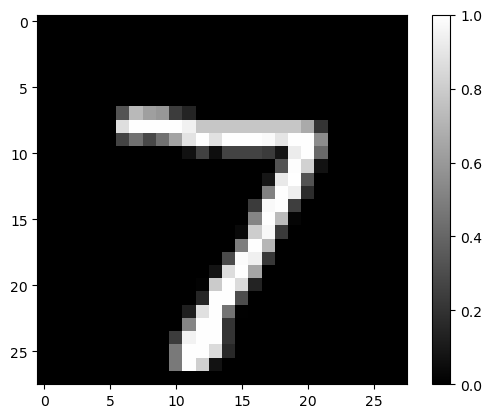

7


In [54]:
plt.figure()
plt.imshow(test_images[0]/255, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(test_labels[0])